# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config1 import api_key
from pprint import pprint

# Import API key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [14]:
units = "imperial" # convert temperature to F
place  = cities
#create empty lists to hold values
name = []
cloudiness = []
country = []
date = []
humidity = []
lat =[]
lng =[]
max_temp =[]
wind_speed = []
cityName = ""
#loop through all the cities and get the required Data

for city in place:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    try: # skipping 404 error, 
        response = requests.get(f"{url}appid={api_key}&q={city}&units={units}").json()
        name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cityName = response["name"]
    except:
        print(cityName+" has no Data. moving to the next one")


Atuona has no Data. moving to the next one
Redmond has no Data. moving to the next one
Cidreira has no Data. moving to the next one
Kutum has no Data. moving to the next one
Santa Rosa has no Data. moving to the next one
Chulym has no Data. moving to the next one
Linxia has no Data. moving to the next one
Hasaki has no Data. moving to the next one
Klaksvik has no Data. moving to the next one
Naze has no Data. moving to the next one
Norman Wells has no Data. moving to the next one
Norman Wells has no Data. moving to the next one
Vaini has no Data. moving to the next one
Bambous Virieux has no Data. moving to the next one
Dawei has no Data. moving to the next one
Coihaique has no Data. moving to the next one
Coihaique has no Data. moving to the next one
Saskylakh has no Data. moving to the next one
Del Rio has no Data. moving to the next one
Saint George has no Data. moving to the next one
Hanna has no Data. moving to the next one
College has no Data. moving to the next one
Abu Dhabi has

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
#create a Dictionary 
new_dict = {"City":name,
            "Cloudiness": cloudiness,
            "Country": country,
            "Date":date,
            "Humidity": humidity,
            "Latitude":lat,
            "longitude": lng,
            "Max Temperature":max_temp,
            "Wind speed": wind_speed}

In [16]:
df = pd.DataFrame(new_dict)
df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,longitude,Max Temperature,Wind speed
0,Ushuaia,75,AR,1547251200,36,-54.81,-68.31,48.20,14.99
1,Atuona,0,PF,1547252644,100,-9.80,-139.03,81.43,17.02
2,Avarua,75,CK,1547251200,70,-21.21,-159.78,84.20,12.75
3,Angoche,80,MZ,1547252644,100,-16.23,39.91,79.13,14.79
4,Denizli,75,TR,1547250600,80,37.77,29.09,41.00,5.82


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
output_data_file = df.to_csv("Output/cities.csv", index=False, header=True)
output_data_file

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

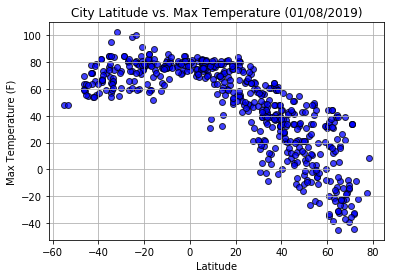

In [18]:
x_axis = df["Latitude"]
y_axis = df["Max Temperature"]
plt.grid() 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (01/08/2019)")
plt.scatter(x_axis, y_axis , marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)
plt.show()

In [19]:
plt.savefig("Images/lat_vs_Temp.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

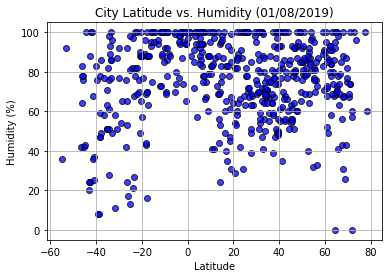

In [20]:
x_axis = df["Latitude"]
y_axis = df["Humidity"]
plt.grid() 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (01/08/2019)")
plt.scatter(x_axis, y_axis , marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)
plt.show()

In [21]:
plt.savefig("Images/lat_vs_Humidity.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

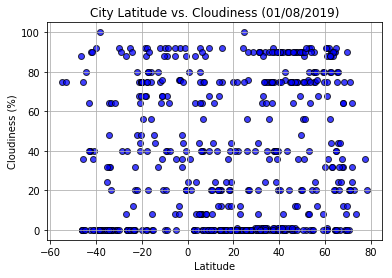

In [22]:
x_axis = df["Latitude"]
y_axis = df["Cloudiness"]
plt.grid() 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (01/08/2019)")
plt.scatter(x_axis, y_axis , marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)
plt.show()

In [23]:
plt.savefig("Images/lat_vs_Cloud.png")


<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

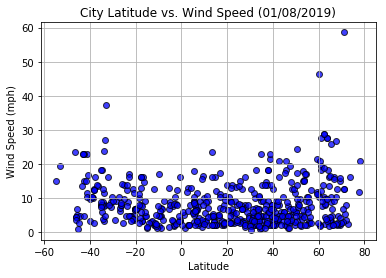

In [24]:
x_axis = df["Latitude"]
y_axis = df["Wind speed"]
plt.grid() 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (01/08/2019)")
plt.scatter(x_axis, y_axis , marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)
plt.show()

In [25]:
plt.savefig("Images/lat_vs_Wind.png")

<Figure size 432x288 with 0 Axes>